# The Finite Square Well

In class, we found the wave functions
$$
\phi_\text{even}(x) = \begin{cases}
Ae^{qx}, & \text{if } x<-a \\
D \cos kx , & \text{if } -a < x < a \\
Ae^{-qx}, & \text{if } x>a
\end{cases}
$$
and
$$
\phi_\text{odd}(x) = \begin{cases}
Ae^{qx}, & \text{if } x<-a \\
C \sin kx , & \text{if } -a < x < a \\
-Ae^{-qx}, & \text{if } x>a
\end{cases}
$$
for the finite square well.  By fitting the boundary conditions, we were left with a transcental energy condition for the even states,
$$
k \tan ka = q,
$$
and one for the odd states,
$$
-ka \cot ka = qa.
$$

Solving them requires numerical work, and we might as well plot the wave functions while we're here.

First, define new dimensionless variables
$$
z = ka = \sqrt{2mEa^2}/\hbar,
$$
which is a scaled energy, and
$$
z_0 = \sqrt{2mV_0 a^2} / \hbar,
$$
which characterizes the "strength" of the well.  It turns out that the energy conditions can then be written as
$$
z \tan z = \sqrt{z_0^2 - z^2} \quad \text{and} \quad -z \cot z = \sqrt{z_0^2 - z^2}.
$$
These equations are more amenable to numerical solution, and we'll do it graphically first.

/tmp/ipykernel_70298/3342364500.py:8: RuntimeWarning: invalid value encountered in divide
  lhs_odd = -z / np.tan(z)
/tmp/ipykernel_70298/3342364500.py:10: RuntimeWarning: invalid value encountered in sqrt
  rhs = np.sqrt(z0**2 - z**2)


(0.0, 10.0)

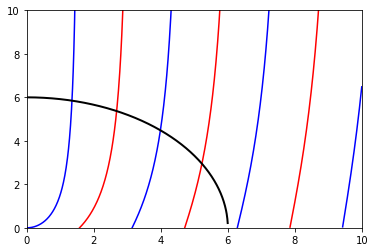

In [2]:
import numpy as np
import matplotlib.pyplot as plt

z0 = 6
z = np.linspace(0, 10, 1000)
lhs_even = z * np.tan(z)
lhs_even[lhs_even<0] = np.nan
lhs_odd = -z / np.tan(z)
lhs_odd[lhs_odd < 0] = np.nan
rhs = np.sqrt(z0**2 - z**2)

plt.plot(z, lhs_even, color="blue")
plt.plot(z, lhs_odd, color="red")
plt.plot(z, rhs, color="black", lw=2)

plt.xlim(0, 10)
plt.ylim(0, 10)

In [5]:
# compute the energies z
from scipy.optimize import fsolve

def feven(z):
    return z * np.tan(z) - np.sqrt(z0**2 - z**2) 

def fodd(z):
    return -z / np.tan(z) - np.sqrt(z0**2 - z**2)

root_even = fsolve(feven, [1, 3])
print(root_even)
root_odd = fsolve(fodd, [2, 5])
print(root_odd)
roots = np.sort(np.append(root_even, root_odd))
print(roots)

[1.34475104 3.98582621]
[2.67878311 5.22596353]
[1.34475104 2.67878311 3.98582621 5.22596353]


(-2.2, 2.2, 0.47600466295326016, 29.800877212396585)

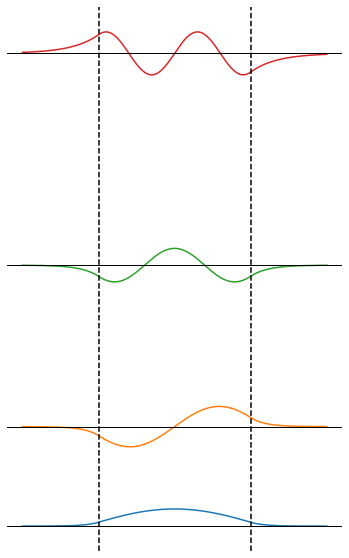

In [6]:
# plot the wave functions
# set a = hbar = m = 1

def phi(x, n):
    z = roots[n-1]
    q = np.sqrt(z0**2 - z**2)
    
    if n % 2:  # even
        
        A = np.exp(q) * np.cos(z) / np.sqrt(1 + 1/q)
        D = 1/np.sqrt(1 + 1/q)
        
        if x < -1:
            return A * np.exp(q*x)
        if x > 1:
            return A * np.exp(-q*x)
        else:
            return D * np.cos(z*x)
    else:
        
        A = -np.exp(q) * np.sin(z)  * np.sqrt(1 + 1/q)
        D = np.sqrt(1 + 1/q)
        
        if x < -1:
            return A * np.exp(q*x)
        if x > 1:
            return -A * np.exp(-q*x)
        else:
            return D * np.sin(z*x)
        
    

x = np.linspace(-2, 2, 1000)
f1 = np.zeros(len(x))
f2 = np.zeros(len(x))
f3 = np.zeros(len(x))
f4 = np.zeros(len(x))
for i in range(len(x)):
    f1[i] = phi(x[i], 1)
    f2[i] = phi(x[i], 2)
    f3[i] = phi(x[i], 3)
    f4[i] = phi(x[i], 4)

fig = plt.figure(figsize=(6, 10))
plt.plot(x, f1 + roots[0]**2)
plt.plot(x, f2 + roots[1]**2)
plt.plot(x, f3 + roots[2]**2)
plt.plot(x, f4 + roots[3]**2)
plt.axvline(-1, color="black", ls="--")
plt.axvline(1, color="black", ls="--")
plt.axhline(roots[0]**2, color="black", lw=1)
plt.axhline(roots[1]**2, color="black", lw=1)
plt.axhline(roots[2]**2, color="black", lw=1)
plt.axhline(roots[3]**2, color="black", lw=1)

plt.axis('off')